In [2]:
#Чтение и обработка данных
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Загрузка данных из train.csv
train_data = pd.read_csv("train.csv", parse_dates=["timestamp"])

# Загрузка данных из macro.csv
macro_data = pd.read_csv("macro.csv", parse_dates=["timestamp"])

In [4]:
# Объединение данных из train_data и macro_data по столбцу timestamp
merged_data = pd.merge(train_data, macro_data, on="timestamp")

# Вывод первых нескольких строк объединенных данных для проверки
merged_data.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0


Количество столбцов до удаления: 391
Количество столбцов после удаления: 379


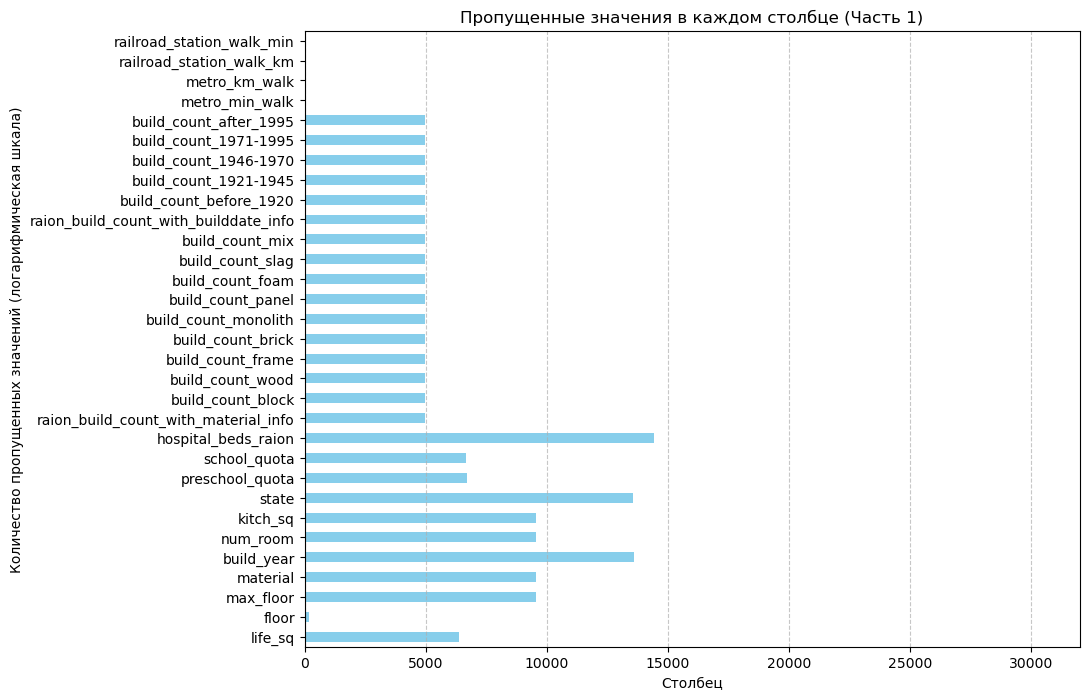

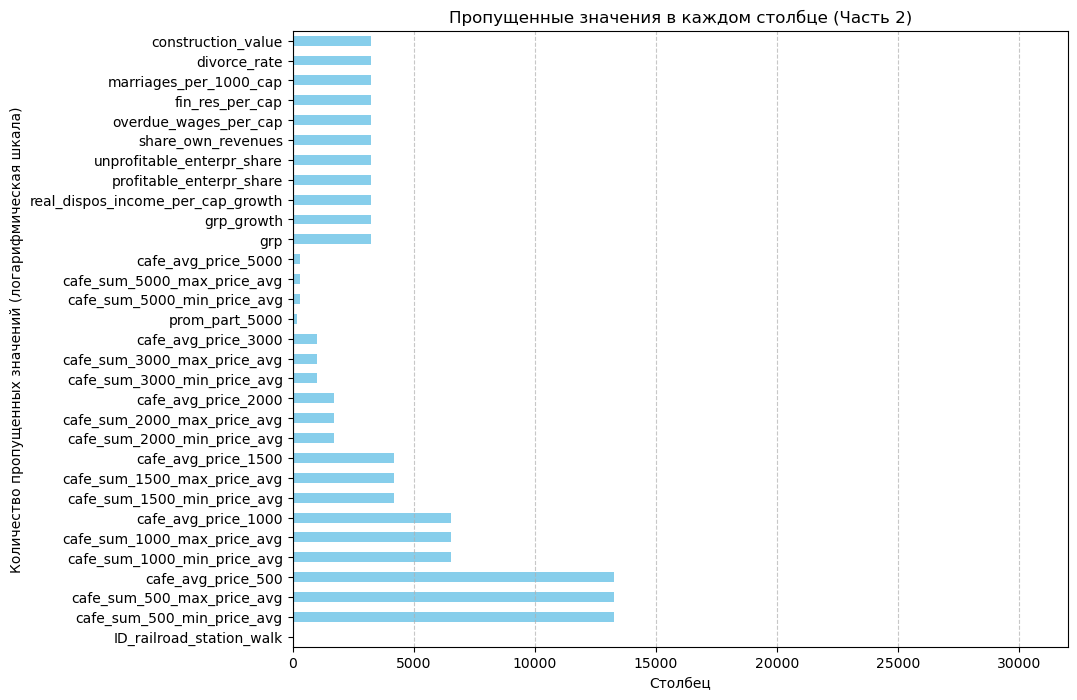

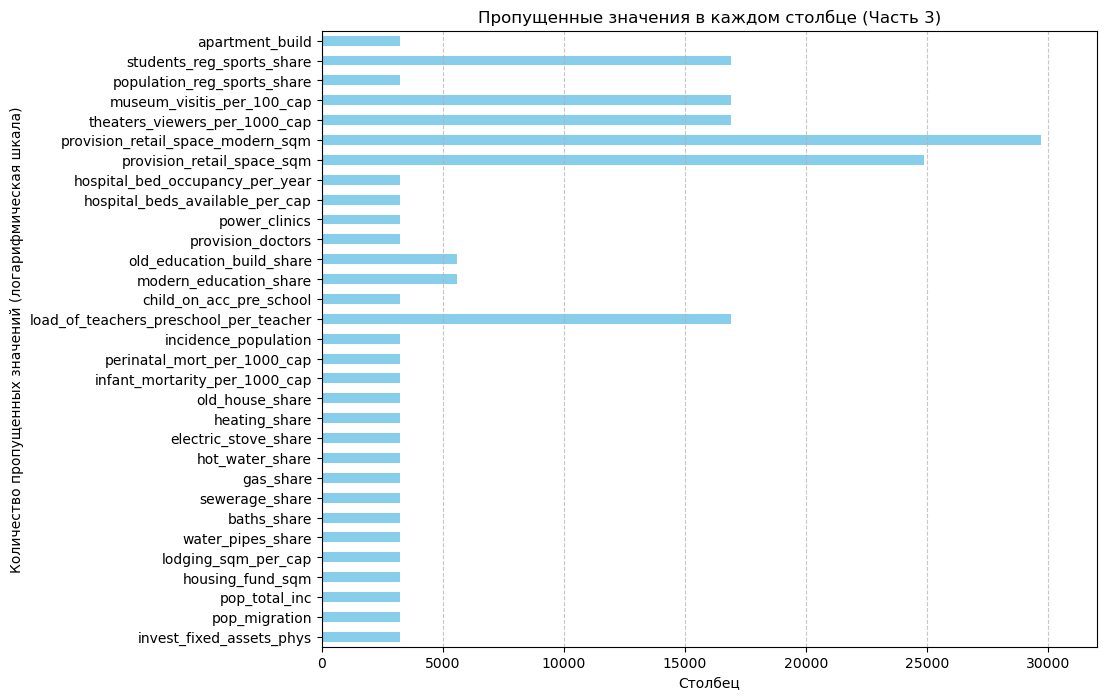

In [5]:
df = pd.DataFrame(merged_data)
num_columns_before_drop = df.shape[1]
print("Количество столбцов до удаления:", num_columns_before_drop)
# Подсчет пропущенных значений в каждом столбце
missing_values_count = df.isnull().sum()

# Отфильтровать столбцы с количеством пропущенных значений больше 10
missing_values_count_filtered = missing_values_count[missing_values_count > 10]


# Разделение на части (например, на две части)
num_slices = 3
slice_size = len(missing_values_count_filtered) // num_slices
if len(missing_values_count_filtered) % num_slices != 0:
    slice_size += 1

# Построение графиков
for i in range(num_slices):
    start_index = i * slice_size
    end_index = min((i + 1) * slice_size, len(missing_values_count_filtered))
    slice_missing_values_count = missing_values_count_filtered.iloc[start_index:end_index]
    
    plt.figure(figsize=(10, 8))
    slice_missing_values_count.plot(kind='barh', color='skyblue')
    plt.title('Пропущенные значения в каждом столбце (Часть {})'.format(i + 1))
    plt.xlabel('Столбец')
    plt.ylabel('Количество пропущенных значений (логарифмическая шкала)')
    plt.xlim([0, 32000])
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout

columns_to_drop = missing_values_count[missing_values_count > 13000].index

# Удаление столбцов из DataFrame
df = df.drop(columns=columns_to_drop)
num_columns_after_drop = df.shape[1]
print("Количество столбцов после удаления:", num_columns_after_drop)

In [6]:
# Рассчитать матрицу корреляции
corr_matrix = df.corr().abs()
num_columns_before_drop = df.shape[1]
print("Количество столбцов до удаления:", num_columns_before_drop)
pd.set_option('display.max_rows', None)

# Выбрать столбцы с наибольшим количеством пропущенных значений из пар с высокой корреляцией
correlation_with_target = df.corr()['price_doc'].abs()
correlation_sorted = correlation_with_target.sort_values(ascending=False)
print(correlation_sorted)


# Определение порога корреляции
threshold = 0.117  # Примерный порог корреляции

# Определение столбцов с корреляцией ниже порога
columns_to_drop = correlation_with_target[correlation_with_target < threshold].index

# Удаление столбцов из DataFrame
df.drop(columns=columns_to_drop, inplace=True)

# Вывод информации о удаленных столбцах
print("Удалены столбцы:", columns_to_drop)

# Вывести оставшиеся столбцы
remaining_columns = df.columns
print("Оставшиеся столбцы после удаления:")
print(remaining_columns)
num_columns_after_drop = df.shape[1]
print("Количество столбцов после удаления:", num_columns_after_drop)


/tmp/ipykernel_45237/1681139578.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()


Количество столбцов до удаления: 379


/tmp/ipykernel_45237/1681139578.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = df.corr()['price_doc'].abs()


price_doc                                     1.000000
num_room                                      0.476337
full_sq                                       0.341840
sport_count_5000                              0.294864
sport_count_3000                              0.290651
trc_count_5000                                0.289371
zd_vokzaly_avto_km                            0.284069
sadovoe_km                                    0.283622
kremlin_km                                    0.279249
bulvar_ring_km                                0.279158
sport_count_2000                              0.278056
ttk_km                                        0.272620
office_sqm_5000                               0.269977
trc_sqm_5000                                  0.268072
sport_count_1500                              0.258376
nuclear_reactor_km                            0.257946
sport_objects_raion                           0.252794
trc_count_3000                                0.242068
cafe_count

In [ ]:
column_name = ('full_sq')

for column_name in df.columns:
    plt.figure(figsize=(10, 6))
    df[column_name].hist(bins=50)
    plt.title(f'Распределение для {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Частота')
    plt.show()


In [ ]:
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_removed = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return outliers_removed

df = remove_outliers(df, 'full_sq')

38      1928
37      1232
39      1013
44      1008
45       943
40       860
32       846
43       832
41       764
51       750
42       695
53       665
52       654
60       635
63       628
34       614
35       613
64       608
58       576
59       575
54       567
36       544
61       543
31       516
46       479
62       474
79       470
57       466
74       466
56       447
77       443
55       408
76       396
50       386
30       385
48       346
47       345
33       319
78       319
75       315
65       302
82       256
73       254
29       248
49       239
72       217
84       191
67       188
80       178
71       158
68       157
66       151
69       144
70       137
81       135
83       134
85       126
27        96
28        89
86        73
102       69
89        63
87        62
90        61
100       60
26        57
96        54
95        50
88        47
101       45
92        43
99        42
94        42
93        40
104       38
98        37
91        37

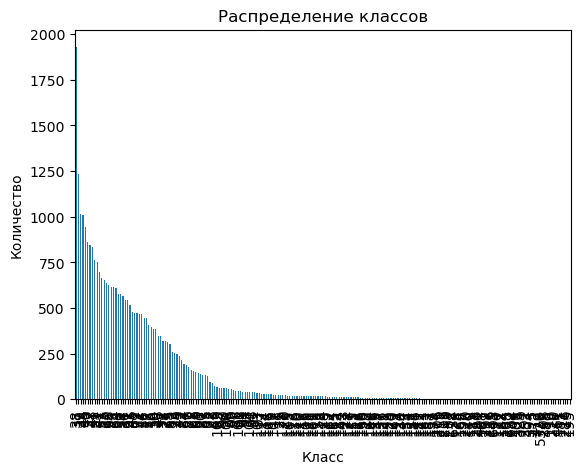

In [11]:
class_counts = df['full_sq'].value_counts()
print(class_counts)

# Вычисляем процентное соотношение для каждого класса
class_percentage = class_counts / len(df) * 100
print(class_percentage)

# Визуализация распределения классов

    
class_counts.plot(kind='bar')
plt.title('Распределение классов')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()


/tmp/ipykernel_45237/3889212960.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


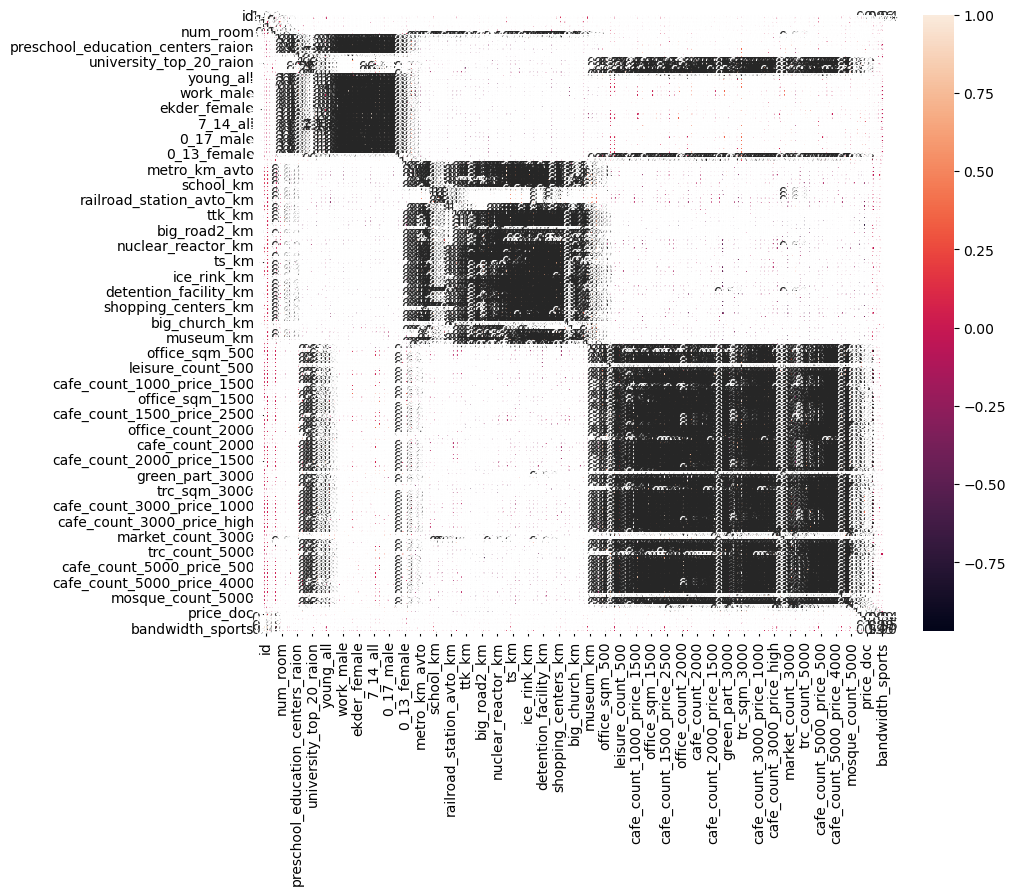

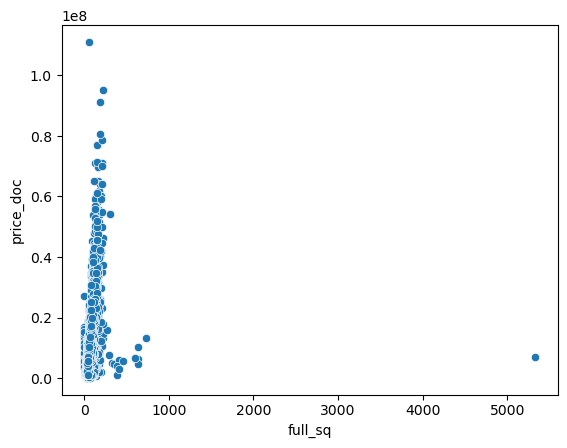

In [14]:
# Рассчитываем корреляционную матрицу
corr_matrix = df.corr()

# Визуализируем корреляционную матрицу
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()
sns.scatterplot(x=df['full_sq'], y=df['price_doc'])
plt.show()

In [15]:


# Преобразование столбца временной метки в тип datetime и извлечение года
df['year'] = pd.to_datetime(df['timestamp']).dt.year

# Расчет основных статистик по годам
stats_by_year = df.groupby('year')['price_doc'].describe()

print(stats_by_year)


        count          mean           std       min        25%        50%  \
year                                                                        
2011    753.0  5.929668e+06  3.829036e+06  340000.0  4300000.0  5500000.0   
2012   4839.0  6.354435e+06  4.518082e+06  190000.0  4174267.0  5650000.0   
2013   7978.0  6.712150e+06  4.313564e+06  260000.0  4462000.0  5900000.0   
2014  13662.0  7.449468e+06  4.882734e+06  100000.0  5000000.0  6552000.0   
2015   3239.0  8.183914e+06  5.610930e+06  500000.0  5350000.0  7100000.0   

            75%          max  
year                          
2011  7150000.0   37000000.0  
2012  7300000.0  111111112.0  
2013  7700000.0   91066096.0  
2014  8500000.0   80777440.0  
2015  9534027.5   95122496.0  


In [6]:
data2 = pd.read_csv('input_data.csv', delimiter=";")
df2 = pd.DataFrame(data2)
# Преобразование столбца временной метки в тип datetime и извлечение года
df2['year'] = pd.to_datetime(df2['date']).dt.year

# Расчет основных статистик по годам
stats_by_year = df2.groupby('year')['price'].describe()

print(stats_by_year)


           count          mean           std  min        25%        50%  \
year                                                                      
2021  11358150.0  6.787516e+06  1.977118e+08  0.0  2600000.0  3995000.0   

            75%           max  
year                           
2021  6500000.0  6.355524e+11  
